### Forecasting Timeseries Data Using Facebook FbProphet
#### Steps Required With FbProphet:-
1. Introduction And Installation
2. Data Preprocessing With Time Seires
3. Model Fitting
4. Obtaining The Forecasts
5. Plotting The Forecasts
6. Cross Validation
7. Computing Performance Metrics
8. Visualize the Performance Metrics
9. Conclusions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('MilkProductiondataset/train.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [3]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [4]:
!pip install prophet

In [5]:
import prophet

<AxesSubplot:>

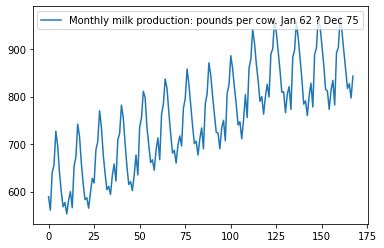

In [6]:
df.plot()

In [7]:
# Recommended column name by prophet
df.columns = ['ds','y']
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df.drop(168,axis=0,inplace=True)

In [9]:
df.tail()

,ds,y
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [10]:
df['ds'] = pd.to_datetime(df['ds'])

In [11]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [12]:
from prophet import Prophet

In [13]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [14]:
# Initialize the Model
model = Prophet()

In [15]:
df.dropna(axis=0,inplace=True)

In [16]:
model.fit(df)

23:00:30 - cmdstanpy - INFO - Chain [1] start processing
23:00:30 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [18]:
# Create future dates of 365 days
future_dates = model.make_future_dataframe(periods=365)

In [19]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [20]:
prediction = model.predict(future_dates)

In [21]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.778110,576.721965,596.142558,606.778110,606.778110,-20.231596,-20.231596,-20.231596,-20.231596,-20.231596,-20.231596,0.0,0.0,0.0,586.546514
1,1962-02-01,608.507143,536.548336,555.677646,608.507143,608.507143,-62.675179,-62.675179,-62.675179,-62.675179,-62.675179,-62.675179,0.0,0.0,0.0,545.831965
2,1962-03-01,610.068851,630.705621,650.760743,610.068851,610.068851,31.271986,31.271986,31.271986,31.271986,31.271986,31.271986,0.0,0.0,0.0,641.340837
3,1962-04-01,611.797885,649.150641,667.814384,611.797885,611.797885,46.647643,46.647643,46.647643,46.647643,46.647643,46.647643,0.0,0.0,0.0,658.445528
4,1962-05-01,613.471143,711.445624,731.774311,613.471143,613.471143,107.989653,107.989653,107.989653,107.989653,107.989653,107.989653,0.0,0.0,0.0,721.460796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1976-11-26,875.042098,804.341144,826.596103,870.939491,879.574203,-59.774511,-59.774511,-59.774511,-59.774511,-59.774511,-59.774511,0.0,0.0,0.0,815.267587
529,1976-11-27,875.060304,806.842067,829.375833,870.941822,879.615392,-56.689888,-56.689888,-56.689888,-56.689888,-56.689888,-56.689888,0.0,0.0,0.0,818.370416
530,1976-11-28,875.078510,810.648670,832.741643,870.944154,879.656581,-53.407782,-53.407782,-53.407782,-53.407782,-53.407782,-53.407782,0.0,0.0,0.0,821.670728
531,1976-11-29,875.096716,813.479766,836.587043,870.946485,879.697770,-49.987167,-49.987167,-49.987167,-49.987167,-49.987167,-49.987167,0.0,0.0,0.0,825.109549


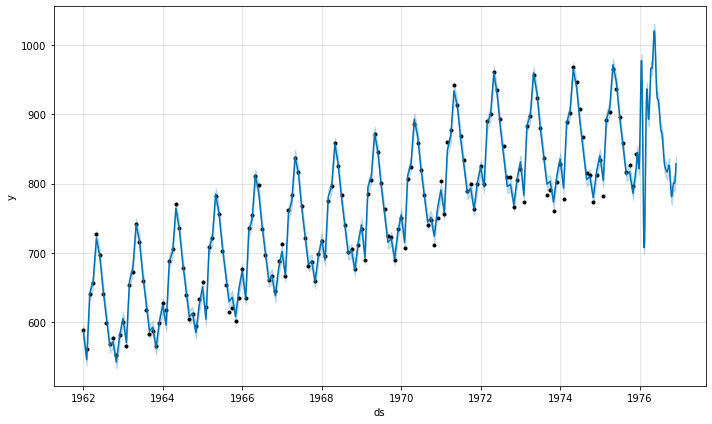

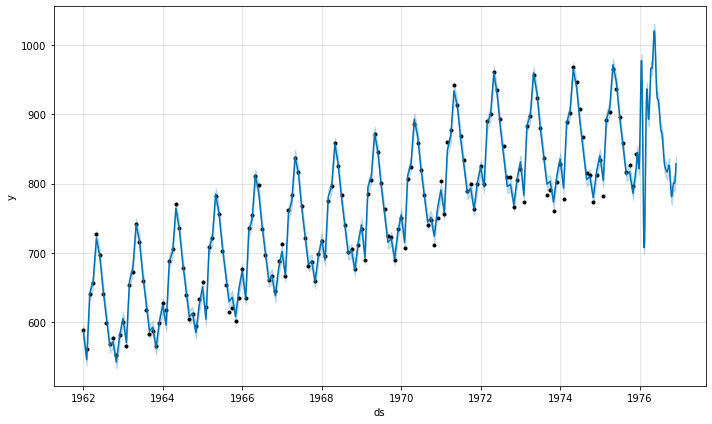

In [22]:
# Plot the predicted projection
model.plot(prediction)

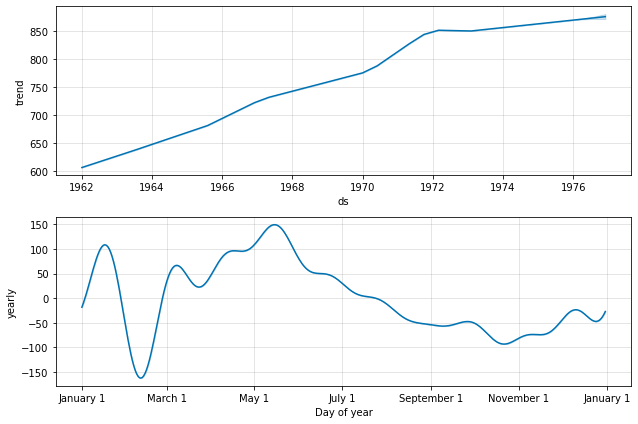

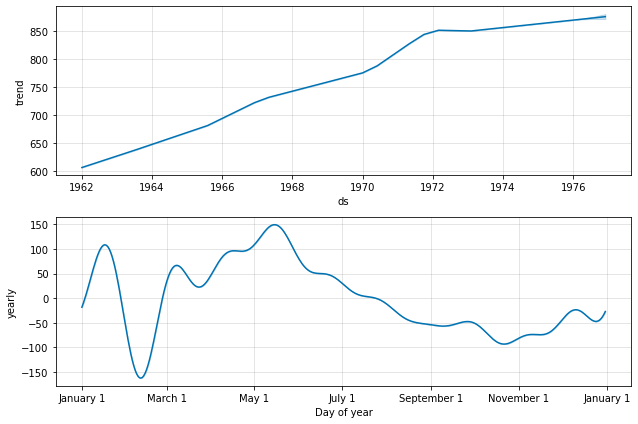

In [23]:
# Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

### Cross Validation
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

1. horizon the forecast horizon
2. initial the size of the initial training period
3. period the spacing between cutoff dates

In [24]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [25]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/23 [00:00<?, ?it/s]

23:30:19 - cmdstanpy - INFO - Chain [1] start processing
23:30:35 - cmdstanpy - INFO - Chain [1] done processing
23:30:36 - cmdstanpy - INFO - Chain [1] start processing
23:30:36 - cmdstanpy - INFO - Chain [1] done processing
23:30:36 - cmdstanpy - INFO - Chain [1] start processing
23:31:05 - cmdstanpy - INFO - Chain [1] done processing
23:31:06 - cmdstanpy - INFO - Chain [1] start processing
23:31:06 - cmdstanpy - INFO - Chain [1] done processing
23:31:06 - cmdstanpy - INFO - Chain [1] start processing
23:31:07 - cmdstanpy - INFO - Chain [1] done processing
23:31:07 - cmdstanpy - INFO - Chain [1] start processing
23:31:08 - cmdstanpy - INFO - Chain [1] done processing
23:31:08 - cmdstanpy - INFO - Chain [1] start processing
23:31:08 - cmdstanpy - INFO - Chain [1] done processing
23:31:09 - cmdstanpy - INFO - Chain [1] start processing
23:31:09 - cmdstanpy - INFO - Chain [1] done processing
23:31:09 - cmdstanpy - INFO - Chain [1] start processing
23:31:10 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1964-02-01,586.092727,584.473058,587.701145,618.0,1964-01-28
1,1964-03-01,677.329615,671.921185,682.624678,688.0,1964-01-28
2,1964-04-01,709.336972,699.174031,719.374227,705.0,1964-01-28
3,1964-05-01,783.860858,768.441395,799.304302,770.0,1964-01-28
4,1964-06-01,750.067692,728.992668,771.385082,736.0,1964-01-28


### Obtaining the Performance Metrics
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [26]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,268.506902,16.386180,12.531411,0.016613,0.013643,0.016650,0.370370
1,38 days,231.526322,15.215989,11.513623,0.014932,0.009894,0.014918,0.407407
2,41 days,234.306501,15.307074,11.661282,0.015124,0.013643,0.015116,0.407407
3,42 days,249.753860,15.803603,12.233428,0.015880,0.014050,0.015879,0.370370
4,43 days,251.092492,15.845898,12.407846,0.016157,0.014050,0.016160,0.370370


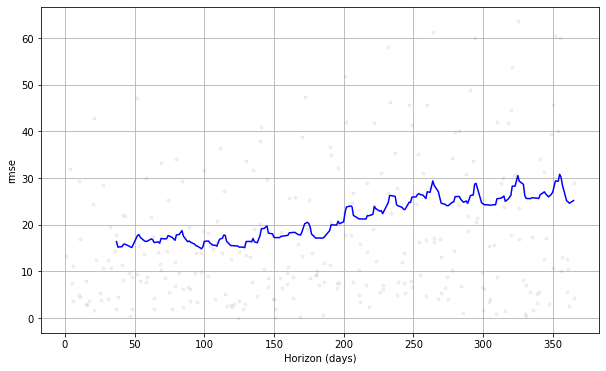

In [27]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')